# Plot frequency of occurrence of tweets about the best animals 

In [81]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
import seaborn as sns

### Read in the CSV made separately
twitter_scrape_retweets.ipynb creates this; I saved a version as "tweet_replies_lock" so that I wouldn't lose the results

In [5]:
df_retwe = pd.read_csv('tweet_replies_lock.csv')
df_retwe.head()

,id,created_at,favorites,retweets,text
0,1126359313985839104,2019-05-09 05:32:41,0,0,b'@MontereyAq jellies!!!'
1,1126358394686844928,2019-05-09 05:29:02,0,0,"b'@MontereyAq I love otters of course, but for..."
2,1126358143137501184,2019-05-09 05:28:02,0,0,b'@MontereyAq Sea Otter ~ \xf0\x9f\x98\x8a'
3,1126357370739675136,2019-05-09 05:24:58,0,0,"b""@MontereyAq Toothed cetaceans, can't pick a ..."
4,1126357162714849281,2019-05-09 05:24:08,0,0,b'@MontereyAq https://t.co/qGtvsWuqeW'


### Concatenate all of the tweeted words and search for keywords
I couldn't quite decide how to do this so first I created a list with all of the words from all of the tweets, thinking I might search that list. But in the following block, I used the original pandas DataFrame to run the analysis. 


In [6]:
all_the_words_nest = []

for index, row in df_retwe.iterrows():
    row_words = row.text.split(" ")
    all_the_words_nest.append(row_words)
    
all_the_words = [item for sublist in all_the_words_nest for item in sublist]

In [100]:
keywords = ['kelp', 'plankton', 'cuttlefish', 'ray', 'shark', 'dragon', 'orca', 'seahorse', 
            'jelly', 'dolphin', 'whale', 'puffin', 'penguin', 'sunfish', 'narwhal', 'manatee',
            'squid', 'mola', 'octopus', 'otter', 'turtle', 'nudibranch', 'mantis']

a = df_retwe['text'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)

N = 1000
common_words = pd.DataFrame(word_dist.most_common(N),
                    columns=['Word', 'Frequency'])
common_words.to_csv('common_words_in_replies.csv')

### Use the keywords to create a new DataFrame with the counts of each keyword
This was a little more brute force than I would've liked&mdash;not as elegant as it could be. But examination of the CSV allows you to pick the keywords that rank at the top (and are actually critters) and analyze them further. 

In [101]:
counts = np.zeros(len(keywords))
data = {'keywords':keywords, 'mentions':counts}
keyword_counts = pd.DataFrame(data)

for word in keywords:
    df_retwe[word] = df_retwe.astype(str).sum(axis=1).str.contains(word)

df_keywords = df_retwe[keywords]

key_sums = df_keywords.sum()
df_key_sums = pd.DataFrame(key_sums)
df_key_sums.reset_index(inplace = True)
df_key_sums.columns = ['keywords', 'mentions']
df_key_sums.sort_values(by = 'mentions', ascending = False, inplace = True)
df_key_sums

,keywords,mentions
19,otter,59
4,shark,44
10,whale,33
18,octopus,23
3,ray,22
9,dolphin,14
5,dragon,14
20,turtle,12
2,cuttlefish,12
21,nudibranch,10


### Plot the results!

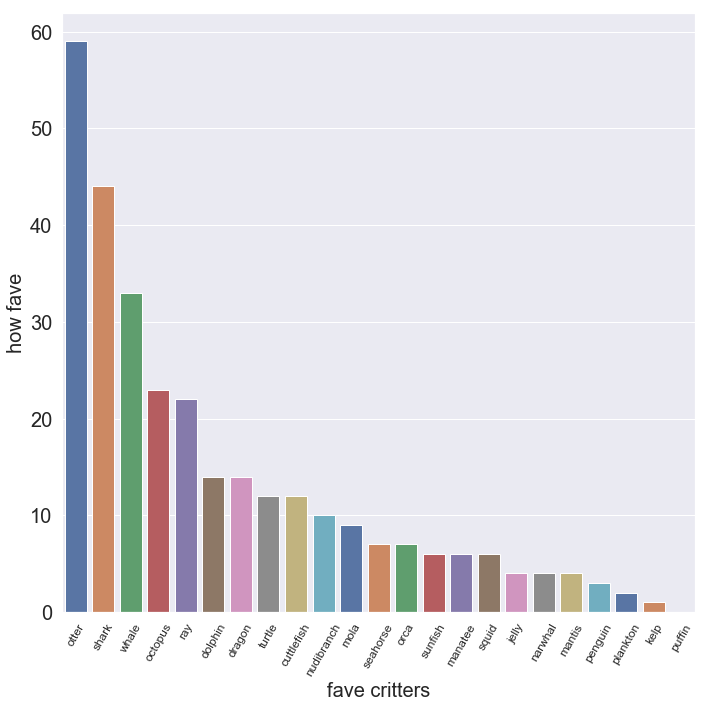

In [126]:
bar_width = 0.35

fig, axs = plt.subplots(figsize = (10, 10))
barplot = sns.barplot(x=df_key_sums['keywords'], y=df_key_sums['mentions'], palette="deep")
plt.xticks(rotation=60)
axs.set_xlabel('fave critters', fontsize=20)
axs.set_ylabel('how fave', fontsize=20)
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=20
plt.tight_layout()
# plt.bar(df_key_sums['keywords'], df_key_sums['sums'])

In [127]:
fig = barplot.get_figure()
fig.savefig('montereyAq_twitter_poll_results.png') 